## 1. El viajante de comercio

Dada una colección finita de ciudades, determinar la gira de mínimo coste, visitando cada ciudad exactamente una vez y volviendo al punto de partida. 

In [13]:
import itertools
import matplotlib.pyplot as plt

def calcular_distancia(ciudad1, ciudad2):
    distancia = abs(ciudad1[0] - ciudad2[0]) + abs(ciudad1[1] - ciudad2[1])
    return distancia

def calcular_coste(viaje, distancias):
    coste_total = 0
    num_ciudades = len(viaje)
    for i in range(num_ciudades):
        ciudad_actual = viaje[i]
        ciudad_siguiente = viaje[(i + 1) % num_ciudades]  # La siguiente ciudad es la primera si estamos en la última
        coste_total += distancias[ciudad_actual][ciudad_siguiente]
    return coste_total

def viajante_comercio(ciudades):
    # Crear una matriz de distancias entre ciudades
    num_ciudades = len(ciudades)
    distancias = [[0] * num_ciudades for _ in range(num_ciudades)]
    for i in range(num_ciudades):
        for j in range(num_ciudades):
            distancias[i][j] = calcular_distancia(ciudades[i], ciudades[j])

    # Generar todas las permutaciones posibles de ciudades
    permutaciones = list(itertools.permutations(range(num_ciudades)))

    mejor_viaje = None
    mejor_coste = float('inf')

    # Calcular el coste de cada viaje y encontrar el más óptimo
    for viaje in permutaciones:
        coste = calcular_coste(viaje, distancias)
        if coste < mejor_coste:
            mejor_viaje = viaje
            mejor_coste = coste

    return mejor_viaje, mejor_coste

# Ejemplo de uso
ciudades = [(0, 0), (1, 2), (3, 1), (5, 6), (7, 3)]
mejor_viaje, mejor_coste = viajante_comercio(ciudades)

print("Mejor viaje:", mejor_viaje)
print("Coste del viaje:", mejor_coste)

Mejor viaje: (0, 1, 3, 4, 2)
Coste del viaje: 26


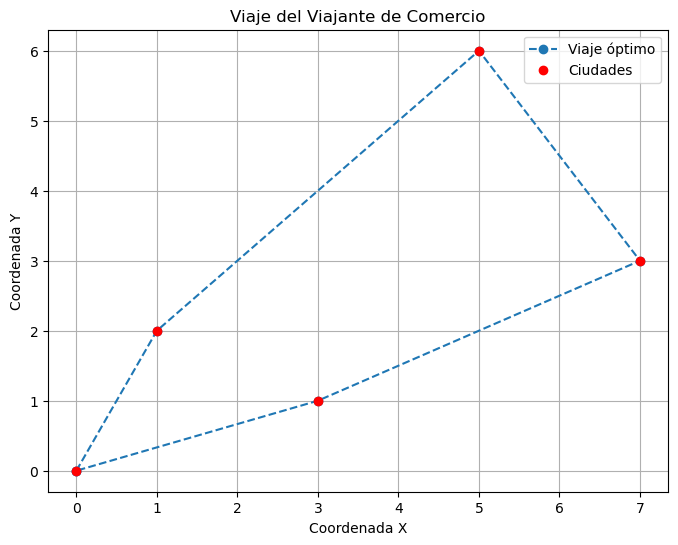

In [18]:
# Obtener las coordenadas de las ciudades en el mejor viaje
coordenadas_viaje = [ciudades[i] for i in mejor_viaje]
coordenadas_viaje.append(coordenadas_viaje[0])  # Agregar el punto de partida al final para cerrar el ciclo

# Obtener las coordenadas de todas las ciudades
coordenadas_ciudades = list(zip(*ciudades))

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.plot([coordenadas_viaje[i][0] for i in range(len(coordenadas_viaje))],
         [coordenadas_viaje[i][1] for i in range(len(coordenadas_viaje))], 'o--')
plt.plot(coordenadas_ciudades[0], coordenadas_ciudades[1], 'ro')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Viaje del Viajante de Comercio')
plt.legend(['Viaje óptimo','Ciudades'])
plt.grid(True)
plt.show()